## FIRST MODEL
DETECTING MELANOMAS BY COMPUTER VISION


Importation of libraries

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

## CARGAR Y PREPROCESAR


In [ ]:
# Definir directorios
base_dir = r"C:\PROYECTO_FINAL\images\melanoma_cancer_dataset"  # Cambia esto a la ubicación de tus datos
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Crear generadores de datos para aumentar el dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalización de píxeles
    rotation_range=20, # Rotaciones aleatorias
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) # Solo normalización

# Cargar imágenes en lotes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamaño de las imágenes
    batch_size=32,
    class_mode='binary'  # Clasificación binaria (benigno o maligno)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria (0: benigno, 1: maligno)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(
    train_generator,
    epochs=5,  # Ajusta según sea necesario
    validation_data=test_generator
)

Epoch 1/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.7394 - loss: 0.5326 - val_accuracy: 0.8740 - val_loss: 0.3245
Epoch 2/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.8566 - loss: 0.3380 - val_accuracy: 0.8910 - val_loss: 0.2914
Epoch 3/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 233s 774ms/step - accuracy: 0.8717 - loss: 0.3185 - val_accuracy: 0.8880 - val_loss: 0.2747
Epoch 4/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.8692 - loss: 0.3184 - val_accuracy: 0.8870 - val_loss: 0.2627
Epoch 5/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step - accuracy: 0.8763 - loss: 0.2962 - val_accuracy: 0.8920 - val_loss: 0.2667


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8928 - loss: 0.2609
Precisión en test: 89.20%


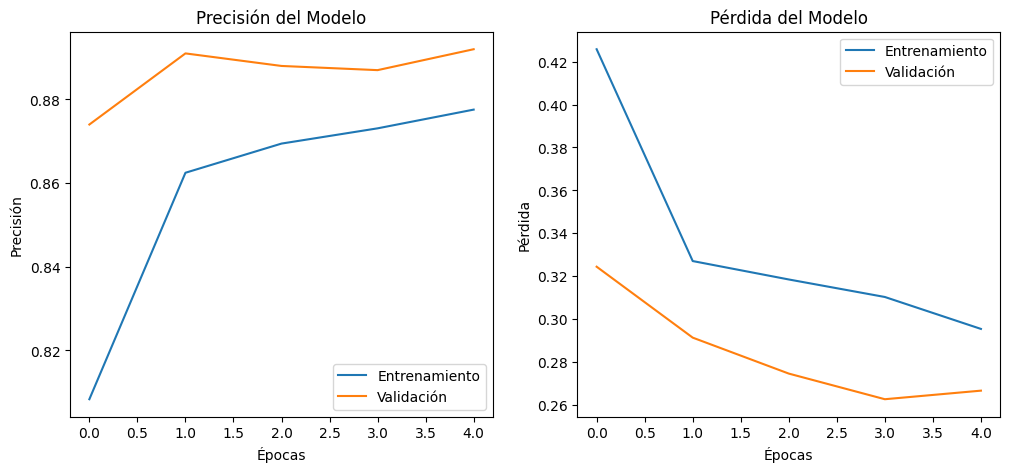

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Precisión en test: {accuracy*100:.2f}%')

# Graficar la precisión y la pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del Modelo')

plt.show()


In [100]:
import cv2
import numpy as np
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalizar
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] > 0.9:
        print(prediction[0][0])
        print("Melanoma maligno detectado")
    else:
        print(prediction[0][0])
        print("Melanoma benigno detectado")
# Prueba con una imagen

predict_image('C:\\PROYECTO_FINAL\\images\\ISIC-images(bcn20000)\\ISIC_0073251.jpg', model)#benigno
predict_image('C:\\PROYECTO_FINAL\\images\\ISIC-images(bcn20000)\\ISIC_0067124.jpg', model)#benigno

print("SUPUESTAMENTE BENIGNOS")
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9608.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9607.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9610.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9708.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9807.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9910.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\benign\\melanoma_9607.jpg', model)

print("SUPUESTAMENTE MALIGNOS")
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\malignant\\melanoma_10107.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\malignant\\melanoma_10107.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\malignant\\melanoma_10108.jpg', model)
predict_image('C:\\PROYECTO_FINAL\\images\\melanoma_cancer_dataset\\test\\malignant\\melanoma_10109.jpg', model)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.9992389
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.9953586
Melanoma maligno detectado
SUPUESTAMENTE BENIGNOS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.9719137
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.946678
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.93070304
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.5718255
Melanoma benigno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.9090426
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.9294224
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0.946678
Melanoma maligno detectado
SUPUESTAMENTE MALIGNOS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.9128568
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.9128568
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.924573
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.93572265
Melanom